## 1. Sports & Mid Events
<p>Whether or not you like sports, the Mid Event is a spectacle. There's a little something for everyone at your Mid Event party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The mid-event shows with the biggest performers in the world. The mid-event shows are spectacular, And here, we're going to explore these shows and answer the questions like:</p>

<ul>
<li>What are the most extreme outcomes of the game?</li>
<li>What's the effect of game on television viewership?</li>
<li>How over time viewership, TV ratings, and ad cost evolved?</li>
<li>Who are the most spectacular performers in terms of mid event show performances?</li>
</ul>

In [6]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
events = pd.read_csv(r'D:\data_scientist_with_python\01_copy TV, Halftime Shows, and the Big Game\datasets\events.csv')
tv = pd.read_csv(r'D:\data_scientist_with_python\01_copy TV, Halftime Shows, and the Big Game\datasets\tv.csv')
mid_inn_event_perf = pd.read_csv(r'D:\data_scientist_with_python\01_copy TV, Halftime Shows, and the Big Game\datasets\mid_inn_event_performer.csv')

# Display the first five rows of each DataFrame
display(events.head())
display(tv.head())
display(mid_inn_event_perf.head())

date  event venue city state  auidance winner_team  winning_pts  \
0  01-01-2019     53   V13   c4    s9     65314        tw12           43   
1  04-02-2018     52   v30  c12    s8     67613        tw16           42   
2  05-02-2017     51   v15   c6   s10     70808        tw11           35   
3  07-02-2016     50    v8  c18    s2     71089         tw5           25   
4  01-02-2015     49   v31   c5    s1     70289        tw11           29   

  winner_1 winner_2 winner_coach loser_team  losing_pts loser_1 loser_2  \
0   wp1_31      NaN         wc_2      tl_19          29  lp1_23     NaN   
1   wp1_24      NaN        wc_11      tl_16          33  lp1_37     NaN   
2   wp1_31      NaN         wc_2       tl_2          28  lp1_27     NaN   
3   wp1_25      NaN        wc_12       tl_5          10   lp1_6     NaN   
4   wp1_31      NaN         wc_2      tl_23          24  lp1_34     NaN   

  loser_coach  pts_combined  pts_difference  
0       lc_20            72              14  
1        lc_2            75               9  
2        lc_8            63               7  
3       lc_32            35              15  
4       lc_28            53               5

event channel  avg_viewers  total_viewers  rating  share  rating_18_49  \
0     53    ch_2    102170000    124000000.0    42.6     63          37.5   
1     52    ch_4    103390000            NaN    43.1     68          33.4   
2     51    ch_3    111319000    172000000.0    45.3     73          37.1   
3     50    ch_2    111864000    167000000.0    46.6     72          37.7   
4     49    ch_4    114442000    168000000.0    47.5     71          39.1   

   share_18_49  ad_cost  
0         74.0  4500000  
1         78.0  5000000  
2         79.0  5000000  
3         79.0  5000000  
4         79.0  4500000

event performer  num_perf
0     53   perf_37      12.0
1     53  perf_103       2.0
2     52   perf_42       8.0
3     51   perf_17       7.0
4     51    perf_6       4.0

## 2. Taking note of dataset issues
<p>In the "events" data, we can see the missing values in the winner2 and loser2 columns (<code>winner_2</code> and <code>loser_2</code>), which make sense given most starting players in the event (<code>winner_1</code> and <code>loser_1</code>) play the entire game.</p>


<p>With the help of the <code>.info()</code> output for <code>tv</code> and <code>mid_inn_event_performance</code> shows us that there are multiple columns with null values.</p>

In [7]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
mid_inn_event_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
event            54 non-null int64
channel          54 non-null object
avg_viewers      54 non-null int64
total_viewers    16 non-null float64
rating           54 non-null float64
share            54 non-null int64
rating_18_49     16 non-null float64
share_18_49      7 non-null float64
ad_cost          54 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
event        136 non-null int64
performer    136 non-null object
num_perf     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


## 3. Combined points distribution
<p>In TV data, the following columns have missing values:</p>
<ul>
<li><code>total_viewers</code> (amount of viewers who watched at least some part of the broadcast)</li>
<li><code>rating_18_49</code> (average % of adults 18-49 who live in a household with a TV that were watching for the entire broadcast)</li>
<li><code>share_18_49</code> (average % of adults 18-49 who live in a household with a TV <em>in use</em> that were watching for the entire broadcast)</li>
</ul>

<p>For the <code>mid_inn_event_performance</code> data, there are missing numbers of performance (<code>num_perf</code>) for about a third of the performances.</p>
<p>There are can be many reasons for these missing values. How the data was tracked? Is it lost in history? Maybe. Watching every mid event show to get performance counts would be great. Rather than doing all this We will explore where data is not perferct and get some info.</p>
<p>Let's start by looking at combined points for each event by visualizing the distribution. Let's also pinpoint the event with the highest and lowest scores.</p>

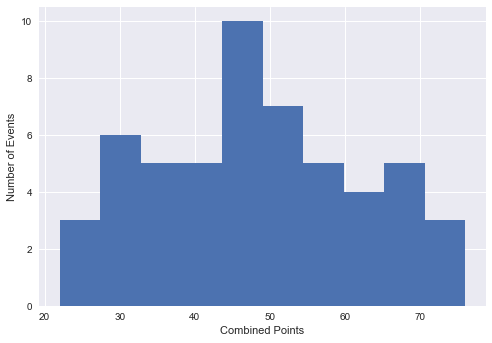

date  event venue city state  auidance winner_team  winning_pts  \
0   01-01-2019     53   V13   c4    s9     65314        tw12           43   
1   04-02-2018     52   v30  c12    s8     67613        tw16           42   
24  29-01-1995     29    v7  c11    s3     74108        tw18           50   

   winner_1 winner_2 winner_coach loser_team  losing_pts loser_1 loser_2  \
0    wp1_31      NaN         wc_2      tl_19          29  lp1_23     NaN   
1    wp1_24      NaN        wc_11      tl_16          33  lp1_37     NaN   
24   wp1_29      NaN        wc_13      tl_21          26  lp1_35     NaN   

   loser_coach  pts_combined  pts_difference  
0        lc_20            72              14  
1         lc_2            75               9  
24        lc_6            76              24

date  event venue city state  auidance winner_team  winning_pts  \
44  12-01-1975      9   v29  c13    s6     80998        tw17           17   
46  14-01-1973      7   v11   c9    s2     90183        tw10           15   
50  12-01-1969      3   v16  c10    s3     75390        tw14           17   

   winner_1 winner_2 winner_coach loser_team  losing_pts loser_1 loser_2  \
44   wp1_30      NaN         wc_7      tl_15           6  lp1_16     NaN   
46    wp1_4      NaN        wc_10      tl_26           7   lp1_2     NaN   
50   wp1_17      NaN        wc_32       tl_3           7  lp1_15   lp2_3   

   loser_coach  pts_combined  pts_difference  
44        lc_7            23              11  
46       lc_13            22               8  
50       lc_11            24              10

In [8]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(events['pts_combined'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Events')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(events[events['pts_combined'] > 70])
display(events[events['pts_combined'] < 25])

## 4. Point difference distribution
<p>Most combined scores are around 40-50 points, with the extremes being roughly equal distance away in opposite directions. Going up to the highest combined scores at 74 and 75. </p>

<p>Let's take a look at point <em>difference</em> now.</p>

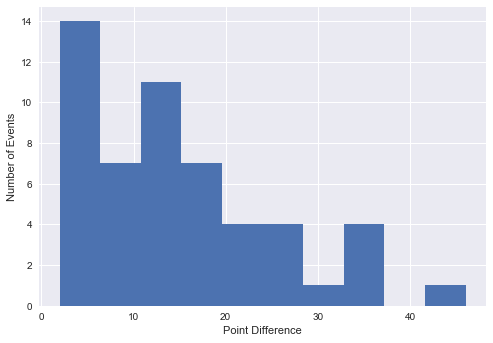

Empty DataFrame
Columns: [date, event, venue, city, state, auidance, winner_team, winning_pts, winner_1, winner_2, winner_coach, loser_team, losing_pts, loser_1, loser_2, loser_coach, pts_combined, pts_difference]
Index: []

date  event venue city state  auidance winner_team  winning_pts  \
5   02-02-2014     48   v13   c4    s9     82530        tw19           44   
26  31-01-1993     27   v23  c15    s2     98375         tw4           53   
29  28-01-1990     24    v9  c13    s6     72920        tw18           56   
33  26-01-1986     20    v9  c13    s6     73819         tw3           47   

   winner_1 winner_2 winner_coach loser_team  losing_pts loser_1 loser_2  \
5    wp1_28      NaN        wc_25       tl_9           8  lp1_29     NaN   
26   wp1_33      NaN        wc_15       tl_4          17  lp1_18   lp2_1   
29   wp1_15      NaN        wc_13       tl_9          10  lp1_21     NaN   
33   wp1_12      NaN        wc_20      tl_16          10  lp1_38   lp2_2   

   loser_coach  pts_combined  pts_difference  
5        lc_20            52              36  
26       lc_24            70              36  
29        lc_9            66              46  
33       lc_30            57              37

In [9]:
# Plot a histogram of point differences
plt.hist(events.pts_difference)
plt.xlabel('Point Difference')
plt.ylabel('Number of Events')
plt.show()

# Display the closest game(s) and biggest blowouts
display(events[events['pts_difference'] == 1])
display(events[events['pts_difference'] >= 35])

## 5. Do blowouts translate to lost viewers?
<p>The vast majority of games are close games. Makes sense. Both teams are likely to be deserving if they've made it this far. </p>

<p>Let's combine our game data and TV to see if this is a universal phenomenon. Do large point differences translate to lost viewers? We can plot <a href="https://en.wikipedia.org/wiki/Nielsen_ratings">household share</a> <em>(average percentage of households with a TV in use that were watching for the entire broadcast)</em> vs. point difference to find out.</p>

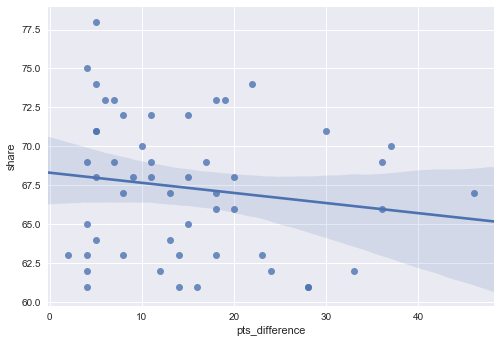

In [10]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['event'] > 1], events, on='event')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='pts_difference', y='share', data=games_tv)
plt.show()

## 6. Viewership and the ad industry over time
<p>The downward sloping regression line and the 95% confidence interval for that regression <em>suggest</em> that bailing on the game if it is a blowout, is common. Though it matches our intuition, we should not consider this as groundbreaking because the linear relationship in the data is weak due to our small sample size of 53 games.</p>

<p>Forget about the score though, I am sure most people stick to for the mid inn event show, which is win situation for the TV networks and advertisers. Ad spot costs a pretty <a href="https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1"></a>now days, but was it always been same way? And how the number of viewers and household ratings trend with ad cost? We can find out using line plots that share a "events" x-axis.</p>

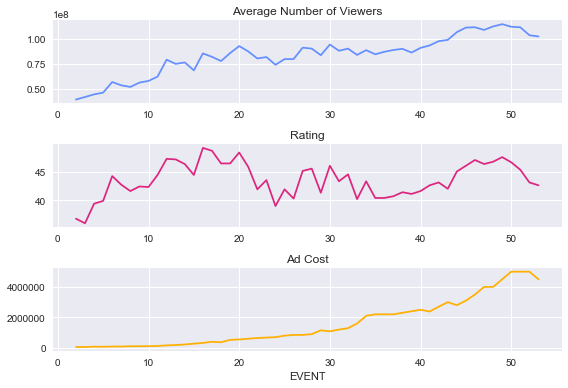

In [11]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(games_tv['event'], games_tv['avg_viewers'], color='#648FFF')
plt.title('Average Number of Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(games_tv['event'], games_tv['rating'], color='#DC267F')
plt.title('Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(games_tv['event'], games_tv['ad_cost'], color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('EVENT')

# Improve the spacing between subplots
plt.tight_layout()

## 7. Halftime shows weren't always this great
<p>We can see viewers increased before ad costs did. Maybe the networks weren't very data savvy and were slow to react?</p>

In [12]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
mid_inn_event_perf[mid_inn_event_perf['event']<=27]

event performer  num_perf
81      27   perf_27       3.0
82      27  perf_103       NaN
83      26   perf_58       3.0
84      25   perf_65       2.0
85      25   perf_21       2.0
86      25   perf_32       2.0
87      25   perf_68       NaN
88      25   perf_84       NaN
89      25   perf_67       NaN
90      24   perf_23       8.0
91      23   perf_15       3.0
92      23   perf_72       NaN
93      23   perf_77       NaN
94      22   perf_29       9.0
95      22   perf_77       9.0
96      21  perf_105       NaN
97      20   perf_95       NaN
98      19   perf_90       8.0
99      19   perf_83       8.0
100     18   perf_45       NaN
101     17  perf_105       NaN
102     16   perf_84       NaN
103     16   perf_31       NaN
104     15  perf_105       NaN
105     15   perf_29       NaN
106     14   perf_40       NaN
107     14   perf_28       NaN
108     13   perf_97       NaN
109     13   perf_65       NaN
110     13    perf_2       NaN
111     12   perf_45       NaN
112     11  perf_105       NaN
113     10   perf_52       NaN
114     10   perf_29       NaN
115      9  perf_104       NaN
116      9   perf_36       NaN
117      8  perf_102       NaN
118      8  perf_108       NaN
119      8    perf_3       NaN
120      7   perf_22       NaN
121      7   perf_12       NaN
122      7    perf_2       NaN
123      7   perf_99       NaN
124      6   perf_76       NaN
125      5   perf_48       NaN
126      5   perf_20       NaN
127      5    perf_2       NaN
128      5   perf_84       NaN
129      4   perf_26       NaN
130      3   perf_29       NaN
131      2  perf_100       NaN
132      2   perf_29       NaN
133      2    perf_2       NaN
134      1  perf_111       NaN
135      1   perf_26       NaN

## 8. Who has the most appearances?

<p>Let's see all of the performers that have done more than one mid inn event show, including their performance counts.</p>

In [14]:
# Count halftime show appearances for each musician and sort them from most to least
mid_inn_event_perf1 = mid_inn_event_perf.groupby('performer').count()['event'].reset_index()
mid_inn_event_perf1 = mid_inn_event_perf.sort_values('event', ascending=False)

# Display musicians with more than one halftime show appearance
mid_inn_event_perf1[mid_inn_event_perf1['event']>1].dropna()

event performer  num_perf
0      53   perf_37      12.0
1      53  perf_103       2.0
2      52   perf_42       8.0
6      51   perf_49       2.0
8      51  perf_110       4.0
..    ...       ...       ...
91     23   perf_15       3.0
94     22   perf_29       9.0
95     22   perf_77       9.0
98     19   perf_90       8.0
99     19   perf_83       8.0

[88 rows x 3 columns]

## 9. Who performed the most songs in a mid inn event show?


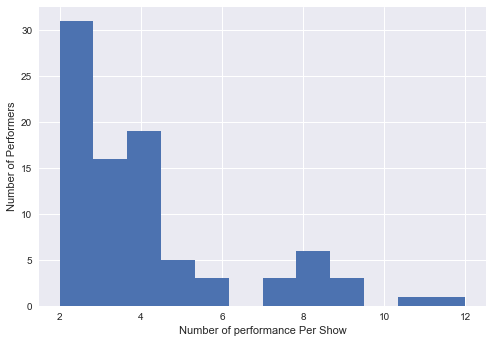

event performer  num_perf
0      53   perf_37      12.0
70     31   perf_19      11.0
10     50   perf_38       9.0
95     22   perf_77       9.0
94     22   perf_29       9.0
98     19   perf_90       8.0
90     24   perf_23       8.0
33     42   perf_69       8.0
16     48    perf_6       8.0
99     19   perf_83       8.0
2      52   perf_42       8.0
14     49   perf_11       7.0
3      51   perf_17       7.0
25     46   perf_81       7.0
30     45   perf_91       6.0

In [16]:
# Plot a histogram of number of songs per performance
most_songs = int(max(mid_inn_event_perf['num_perf'].values))
plt.hist(mid_inn_event_perf.num_perf.dropna(), bins=most_songs)
plt.xlabel('Number of performance Per Show')
plt.ylabel('Number of Performers')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
mid_inn_event_perf = mid_inn_event_perf.sort_values('num_perf', ascending=False)
# ...and display the top 15
display(mid_inn_event_perf.head(15))